In [190]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pytz

In [191]:
dir_sw_in="C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Vaira_2021\\Vaira_2021\\SW_IN\\"
dir_albedo="C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Vaira_2021\\Vaira_2021\\Albedo\\"
dir_lw_in="C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Vaira_2021\\Vaira_2021\\LW_IN\\"
dir_netrad="C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Vaira_2021\\Vaira_2021\\NETRAD\\"
dir_lw_out="C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Vaira_2021\\Vaira_2021\\LW_OUT\\"
dir_trans="C:\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Vaira_2021\\Vaira_2021\\Trans\\"

In [192]:
## Read the files as list and concatenate them
file_list=os.listdir(dir_sw_in)
sw_in=[]
albedo=[]
lw_in=[]
lw_out=[]
netrad=[]
trans=[]
for i in range(len(file_list)):
    sw_in.append(pd.read_csv(dir_sw_in+file_list[i],parse_dates=["date"]))
    albedo.append(pd.read_csv(dir_albedo+file_list[i],parse_dates=["date"]))
    lw_in.append(pd.read_csv(dir_lw_in+file_list[i],parse_dates=["date"]))
    lw_out.append(pd.read_csv(dir_lw_out+file_list[i],parse_dates=["date"]))
    netrad.append(pd.read_csv(dir_netrad+file_list[i],parse_dates=["date"]))
    trans.append(pd.read_csv(dir_trans+file_list[i],parse_dates=["date"]))

    #........More variables come here..........
sw_in=pd.concat(sw_in)
albedo=pd.concat(albedo)
lw_in=pd.concat(lw_in)
lw_out=pd.concat(lw_out)
netrad=pd.concat(netrad)
trans=pd.concat(trans)
trans.head()
#.............

,Unnamed: 0,id,longitude,latitude,date,UB,B,GR,R,NIR,...,EF,id.1,longitude.2,latitude.2,Rn24h_G,AirT_G,RH_G,ux_G,SW_Down,image_id
0,0,0,-120.950922,38.413354,2021-01-09 18:39:43.203000064,-0.05447,-0.040775,0.098072,0.08875,0.219513,...,-0.266145,0,-120.950922,38.413354,31.830273,9.5512,62.455353,0.866972,124.060187,LC08_L1TP_043033_20210109_20210307_02_T1
1,1,1,-120.950922,38.413354,2021-01-09 18:39:43.203000064,-0.05447,-0.040775,0.098072,0.08875,0.219513,...,0.069550,1,-120.950922,38.413354,31.830273,9.5512,62.455353,0.866972,124.060187,LC08_L1TP_043033_20210109_20210307_02_T1
2,2,2,-120.950922,38.413354,2021-01-09 18:39:43.203000064,-0.05447,-0.040775,0.098072,0.08875,0.219513,...,0.264469,2,-120.950922,38.413354,31.830273,9.5512,62.455353,0.866972,124.060187,LC08_L1TP_043033_20210109_20210307_02_T1
3,3,3,-120.950922,38.413354,2021-01-09 18:39:43.203000064,-0.05447,-0.040775,0.098072,0.08875,0.219513,...,0.391425,3,-120.950922,38.413354,31.830273,9.5512,62.455353,0.866972,124.060187,LC08_L1TP_043033_20210109_20210307_02_T1
4,4,4,-120.950922,38.413354,2021-01-09 18:39:43.203000064,-0.05447,-0.040775,0.098072,0.08875,0.219513,...,0.480370,4,-120.950922,38.413354,31.830273,9.5512,62.455353,0.866972,124.060187,LC08_L1TP_043033_20210109_20210307_02_T1


In [193]:
sw_in.iloc[25]

Unnamed: 0                                          25
id                                                  25
longitude                                  -120.950922
latitude                                     38.413354
date                     2021-01-25 18:40:02.360999936
                                ...                   
AirT_G                                        5.056608
RH_G                                         73.299829
ux_G                                          1.779044
SW_Down                                     109.647109
image_id      LC08_L1TP_043034_20210125_20210305_02_T1
Name: 25, Length: 67, dtype: object

In [221]:
## Seperate them into a list of multiple dataframes for each sensitivity percent
## Here all our vairables are at -15,-10,1,10,15% sensitivity whihc will result in5 dfs for each variable
magnitude=[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]
sw_in_sep=[sw_in.iloc[i:sw_in.shape[0]:len(magnitude)] for i in range(len(magnitude))]
albedo_sep=[albedo.iloc[i:albedo.shape[0]:len(magnitude)] for i in range(len(magnitude))]
lw_in_sep=[lw_in.iloc[i:lw_in.shape[0]:len(magnitude)] for i in range(len(magnitude))]
lw_out_sep=[lw_out.iloc[i:lw_out.shape[0]:len(magnitude)] for i in range(len(magnitude))]
netrad_sep=[netrad.iloc[i:netrad.shape[0]:len(magnitude)] for i in range(len(magnitude))]
trans_sep=[trans.iloc[i:trans.shape[0]:len(magnitude)] for i in range(len(magnitude))]


In [222]:
for i in range(len(magnitude)):
    sw_in_sep[i]=sw_in_sep[i].iloc[25]
    albedo_sep[i]=albedo_sep[i].iloc[25]
    lw_in_sep[i]=lw_in_sep[i].iloc[25]
    lw_out_sep[i]=lw_out_sep[i].iloc[25]
    netrad_sep[i]=netrad_sep[i].iloc[25]
    trans_sep[i]=trans_sep[i].iloc[25]

In [223]:
sw_in_sep[0]["LE"]

307.73054538909685

### SW IN sensitivity analysis 
- The second array(i=2) is unperturbed
- Rest are all shifted
- The dataframes still have to be processed for LE anomalies 

In [224]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(( Y_Predicted-Y_actual)/Y_actual)*100
    return mape
from sklearn.metrics import mean_squared_error 

In [225]:
sw_in_sep[0][

SyntaxError: '[' was never closed (2143983649.py, line 1)

In [226]:
def LE_process(df,LE_SEBAL,sen_var_SEBAL):
#     df=df[(df["Tao_sw"]<=1)]
#     df=df[(df[sen_var_SEBAL].notna()) &(df[LE_SEBAL].notna()) & (df["B"].notna())]

    return df
swin_le=[]
albedo_le=[]
lwin_le=[]
lwout_le=[]
netrad_le=[]
trans_le=[]
for i in range(len(sw_in_sep)):
    swin_le.append(LE_process(sw_in_sep[i],"LE","Rs_down"))
    albedo_le.append(LE_process(albedo_sep[i],"LE","ALFA"))
    lwin_le.append(LE_process(lw_in_sep[i],"LE","Rl_down"))
    lwout_le.append(LE_process(lw_out_sep[i],"LE","Rl_up"))
    netrad_le.append(LE_process(netrad_sep[i],"LE","Rn"))
    trans_le.append(LE_process(trans_sep[i],"LE","Tao_sw"))


In [227]:
trans_le[9][["Tao_sw","LE","image_id"]].shape

(3,)

In [228]:
trans_sep[5][["Tao_sw","LE","image_id","Rs_down","H","Rn","Rl_up","Rl_down"]]

Tao_sw                                      0.769819
LE                                        680.897258
image_id    LC08_L1TP_044033_20210524_20210529_02_T1
Rs_down                                   932.170654
H                                               -0.0
Rn                                        734.719704
Rl_up                                     368.553619
Rl_down                                   313.005682
Name: 60, dtype: object

In [229]:
trans_sep[0].columns

AttributeError: 'Series' object has no attribute 'columns'

In [230]:
## Calculate average bias of LE vs  of SW IN and plot scatter plot 
## LE_y is the observed ET and LE_x is the SEBAL ET 
## I need a df with columns as bias and rmse of albedo and LE and rows represent the perturbation 
def get_station_error(list_df,LE_SEBAL,sen_var_SEBAL,variable):
    bias_LE=[]
    rmse_LE=[]
    bias_var=[]
    rmse_var=[]
    df=pd.DataFrame()
    magnitude=[-50,-40,-30,-20,-10,0,10,20,30,40,50]
    for i in range(len(list_df)):
#         print(MAPE(list_df[i][LE_SEBAL],list_df[i][LE_SEBAL])
#         if sen_var_SEBAL=="Tao_sw" and i==9:
        
        bias_LE.append(MAPE(list_df[5][LE_SEBAL],list_df[i][LE_SEBAL]))
        print(list_df[5][LE_SEBAL]-list_df[i][LE_SEBAL])
        print("Shape of the df 5",list_df[5].shape)
        print("shape of df"+str(i),list_df[i].shape)
        bias_var.append(MAPE(list_df[5][sen_var_SEBAL],list_df[i][sen_var_SEBAL]))
#         rmse_LE.append(mean_squared_error(list_df[5][LE_SEBAL], \
#                    list_df[i][LE_SEBAL],squared=False))
#         rmse_var.append(mean_squared_error(list_df[5][sen_var_SEBAL], \
#                    list_df[i][sen_var_SEBAL],squared=False))
    df["Bias_LE"]=bias_LE
#     df["rmse_LE"]=rmse_LE
    df["Bias_"+variable]=bias_var
#     df["rmse_"+variable]=rmse_var
    df["Sensitivity"]=magnitude
    return df
sw_in_error=get_station_error(swin_le,"LE","Rs_down","SW_IN")
albedo_error=get_station_error(albedo_le,"LE","ALFA","Albedo")
lw_in_error=get_station_error(lwin_le,"LE","Rl_down","LW_IN")
lw_out_error=get_station_error(lwout_le,"LE","Rl_up","LW_OUT")
netrad_error=get_station_error(netrad_le,"LE","Rn","NETRAD")
trans_error=get_station_error(trans_le,"LE","Tao_sw","tao")
        
        
    

373.16671284338713
Shape of the df 5 (67,)
shape of df0 (67,)
298.5333898215929
Shape of the df 5 (67,)
shape of df1 (67,)
223.90001793259069
Shape of the df 5 (67,)
shape of df2 (67,)
149.26669491079645
Shape of the df 5 (67,)
shape of df3 (67,)
74.63337188900232
Shape of the df 5 (67,)
shape of df4 (67,)
0.0
Shape of the df 5 (67,)
shape of df5 (67,)
-74.63332302179424
Shape of the df 5 (67,)
shape of df6 (67,)
-149.26664604358848
Shape of the df 5 (67,)
shape of df7 (67,)
-223.89996906538283
Shape of the df 5 (67,)
shape of df8 (67,)
-298.533389821593
Shape of the df 5 (67,)
shape of df9 (67,)
-373.16671284338724
Shape of the df 5 (67,)
shape of df10 (67,)
-64.89901840210734
Shape of the df 5 (67,)
shape of df0 (67,)
-51.841357661011784
Shape of the df 5 (67,)
shape of df1 (67,)
-38.82262545025333
Shape of the df 5 (67,)
shape of df2 (67,)
-25.84282176983197
Shape of the df 5 (67,)
shape of df3 (67,)
-12.901946619747378
Shape of the df 5 (67,)
shape of df4 (67,)
0.0
Shape of the df 

## Bias in Daily ET 

In [272]:
## Calculate average bias of LE vs  of SW IN and plot scatter plot 
## LE_y is the observed ET and LE_x is the SEBAL ET 
## I need a df with columns as bias and rmse of albedo and LE and rows represent the perturbation 
def get_station_error(list_df,LE_SEBAL,sen_var_SEBAL,variable):
    bias_LE=[]
    rmse_LE=[]
    bias_var=[]
    rmse_var=[]
    df=pd.DataFrame()
    magnitude=[-50,-40,-30,-20,-10,0,10,20,30,40,50]
    for i in range(len(list_df)):
#         print(MAPE(list_df[i][LE_SEBAL],list_df[i][LE_SEBAL])
#         if sen_var_SEBAL=="Tao_sw" and i==9:
        
        bias_LE.append(MAPE(list_df[5][LE_SEBAL],list_df[i][LE_SEBAL]))
        print(list_df[5][LE_SEBAL]-list_df[i][LE_SEBAL])
        print("Shape of the df 5",list_df[5].shape)
        print("shape of df"+str(i),list_df[i].shape)
        bias_var.append(MAPE(list_df[5][sen_var_SEBAL],list_df[i][sen_var_SEBAL]))
#         rmse_LE.append(mean_squared_error(list_df[5][LE_SEBAL], \
#                    list_df[i][LE_SEBAL],squared=False))
#         rmse_var.append(mean_squared_error(list_df[5][sen_var_SEBAL], \
#                    list_df[i][sen_var_SEBAL],squared=False))
    df["Bias_LE"]=bias_LE
#     df["rmse_LE"]=rmse_LE
    df["Bias_"+variable]=bias_var
#     df["rmse_"+variable]=rmse_var
    df["Sensitivity"]=magnitude
    return df
sw_in_error_daily=get_station_error(swin_le,"ET_24h","Rs_down","SW_IN")
albedo_error_daily=get_station_error(albedo_le,"ET_24h","ALFA","Albedo")
lw_in_error_daily=get_station_error(lwin_le,"ET_24h","Rl_down","LW_IN")
lw_out_error_daily=get_station_error(lwout_le,"ET_24h","Rl_up","LW_OUT")
netrad_error_daily=get_station_error(netrad_le,"ET_24h","Rn","NETRAD")
trans_error_daily=get_station_error(trans_le,"ET_24h","Tao_sw","tao")
        
        
    

0.0
Shape of the df 5 (67,)
shape of df0 (67,)
0.0
Shape of the df 5 (67,)
shape of df1 (67,)
0.0
Shape of the df 5 (67,)
shape of df2 (67,)
0.0
Shape of the df 5 (67,)
shape of df3 (67,)
0.0
Shape of the df 5 (67,)
shape of df4 (67,)
0.0
Shape of the df 5 (67,)
shape of df5 (67,)
0.0
Shape of the df 5 (67,)
shape of df6 (67,)
0.0
Shape of the df 5 (67,)
shape of df7 (67,)
0.0
Shape of the df 5 (67,)
shape of df8 (67,)
0.0
Shape of the df 5 (67,)
shape of df9 (67,)
0.0
Shape of the df 5 (67,)
shape of df10 (67,)
-0.8167995994389052
Shape of the df 5 (67,)
shape of df0 (67,)
-0.6534396792394794
Shape of the df 5 (67,)
shape of df1 (67,)
-0.4900797647042907
Shape of the df 5 (67,)
shape of df2 (67,)
-0.3267198362078094
Shape of the df 5 (67,)
shape of df3 (67,)
-0.16335992167261892
Shape of the df 5 (67,)
shape of df4 (67,)
0.0
Shape of the df 5 (67,)
shape of df5 (67,)
0.16335983142757904
Shape of the df 5 (67,)
shape of df6 (67,)
0.3267198403988525
Shape of the df 5 (67,)
shape of df7 

In [252]:
swin_le[0].index

Index(['Unnamed: 0', 'id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR',
       'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI',
       'EVI', 'SAVI', 'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude.1',
       'latitude.1', 'NDVI_neg', 'pos_NDVI', 'int', 'sd_ndvi', 'NDWI',
       'LST_neg', 'LST_NW', 'T_LST_DEM', 'LST_neg_1', 'LST_NW_1', 'Tao_sw',
       'EA', 'W_ATM', 'Rl_up', 'Rs_down', 'Tao_sw_1', 'ES', 'EA_1', 'Rl_down',
       'Rn', 'G', 'zom', 'u_fr', 'H', 'rah', 'dT', 'rah_first', 'zom_1',
       'u_fr_1', 'ufric_star', 'ET_inst', 'ET_24h', 'LE', 'EF', 'id.1',
       'longitude.2', 'latitude.2', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G',
       'SW_Down', 'image_id'],
      dtype='object')

## Plotting

In [209]:
# Albedo

KeyError: 'rmse_LE'

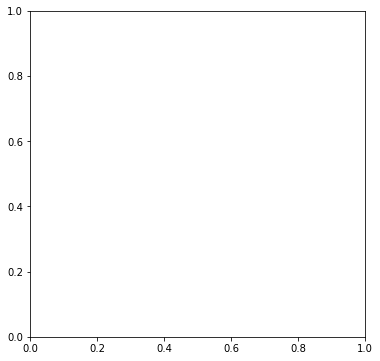

In [210]:
## Plotting the errors 
fig,ax=plt.subplots(figsize=(6,6))
plt.plot(albedo_error["Sensitivity"],albedo_error["rmse_LE"],"o",c="b",label="Albedo")
plt.plot(sw_in_error["Sensitivity"],sw_in_error["rmse_LE"],"o",c="r",label="SW IN")
plt.plot(lw_in_error["Sensitivity"],lw_in_error["rmse_LE"],"o",c="g",label="LW IN")
plt.plot(lw_out_error["Sensitivity"],lw_out_error["rmse_LE"],"o",c="y",label="LW OUT")
plt.plot(netrad_error["Sensitivity"],netrad_error["rmse_LE"],"o",c="m",label="NETRAD")
# plt.plot(trans_error["Sensitivity"],trans_error["rmse_LE"],"o",c="c",label=r"$\tau_{sw}$")

plt.legend(fontsize=10)
plt.xlabel("Perturbation in %",fontsize=20)
plt.ylabel("$LE_{inst}$ RMSE $(W/m^2)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(np.linspace(0,0,5),np.linspace(75,180,5),linewidth=2,c="k")
plt.plot(np.linspace(-15,15,5),np.linspace(123,123,5),linewidth=2,c="k")

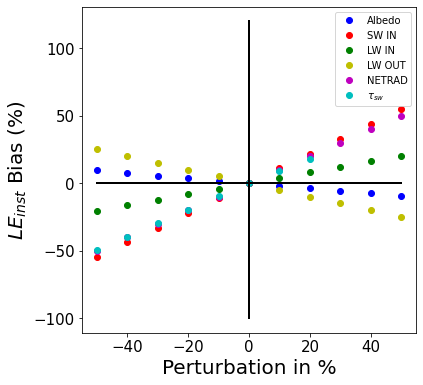

In [177]:
## Plotting the errors 
fig,ax=plt.subplots(figsize=(6,6))
plt.plot(albedo_error["Sensitivity"],albedo_error["Bias_LE"],"o",c="b",label="Albedo")
plt.plot(sw_in_error["Sensitivity"],sw_in_error["Bias_LE"],"o",c="r",label="SW IN")
plt.plot(lw_in_error["Sensitivity"],lw_in_error["Bias_LE"],"o",c="g",label="LW IN")
plt.plot(lw_out_error["Sensitivity"],lw_out_error["Bias_LE"],"o",c="y",label="LW OUT")
plt.plot(netrad_error["Sensitivity"],netrad_error["Bias_LE"],"o",c="m",label="NETRAD")
plt.plot(trans_error["Sensitivity"],trans_error["Bias_LE"],"o",c="c",label=r"$\tau_{sw}$")

plt.legend(fontsize=10)
plt.xlabel("Perturbation in %",fontsize=20)
plt.ylabel("$LE_{inst}$ Bias (%)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(np.linspace(0,0,10),np.linspace(-100,120,10),linewidth=2,c="k")
plt.plot(np.linspace(-50,50,5),np.linspace(0,0,5),linewidth=2,c="k")

In [278]:
sw_in_sep[0][["Rs_down","image_id","LE","ET_24h","Rn","EF"]]

Rs_down                                   466.085327
image_id    LC08_L1TP_044033_20210524_20210529_02_T1
LE                                        307.730545
ET_24h                                      7.554333
Rn                                        332.055523
EF                                               1.0
Name: 55, dtype: object

In [277]:
sw_in_sep[5][["Rs_down","image_id","LE","ET_24h","Rn","EF"]]

Rs_down                                   932.170654
image_id    LC08_L1TP_044033_20210524_20210529_02_T1
LE                                        680.897258
ET_24h                                      7.554333
Rn                                        734.719704
EF                                               1.0
Name: 60, dtype: object

In [235]:
sw_in_sep[0][["Rs_down","ALFA","Rl_down","Rl_up","G","Rn","Tao_sw","image_id","LE","e_0"]]

Rs_down                                   466.085327
ALFA                                        0.136072
Rl_down                                   313.005682
Rl_up                                     368.553619
G                                          24.324978
Rn                                        332.055523
Tao_sw                                      0.769819
image_id    LC08_L1TP_044033_20210524_20210529_02_T1
LE                                        307.730545
e_0                                         0.951884
Name: 55, dtype: object

In [236]:
sw_in_sep[5][["Rs_down","ALFA","Rl_down","Rl_up","G","Rn","Tao_sw","image_id","LE","e_0"]]

Rs_down                                   932.170654
ALFA                                        0.136072
Rl_down                                   313.005682
Rl_up                                     368.553619
G                                          53.822445
Rn                                        734.719704
Tao_sw                                      0.769819
image_id    LC08_L1TP_044033_20210524_20210529_02_T1
LE                                        680.897258
e_0                                         0.951884
Name: 60, dtype: object

In [237]:
466*(1-0.13)+313-368-(1-0.95)*313

334.77000000000004

In [238]:
932*(1-0.13)+313-368-(1-0.95)*313

740.1900000000002

In [240]:
((740-334)/334)

1.215568862275449

In [241]:
466*(1-0.63)+313-368-(1-0.95)*313

241.57000000000002

In [242]:
932*(1-0.63)+313-368-(1-0.95)*313

553.79

In [243]:
(553-241)/241

1.2946058091286308

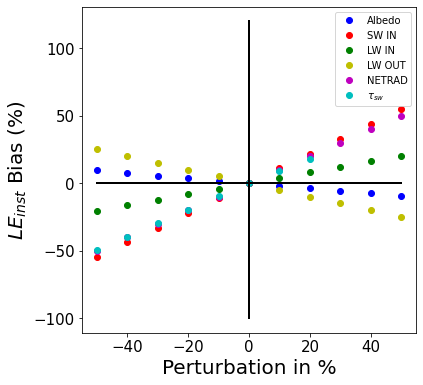

In [271]:
## Plotting the errors 
fig,ax=plt.subplots(figsize=(6,6))
plt.plot(albedo_error["Sensitivity"],albedo_error["Bias_LE"],"o",c="b",label="Albedo")
plt.plot(sw_in_error["Sensitivity"],sw_in_error["Bias_LE"],"o",c="r",label="SW IN")
plt.plot(lw_in_error["Sensitivity"],lw_in_error["Bias_LE"],"o",c="g",label="LW IN")
plt.plot(lw_out_error["Sensitivity"],lw_out_error["Bias_LE"],"o",c="y",label="LW OUT")
plt.plot(netrad_error["Sensitivity"],netrad_error["Bias_LE"],"o",c="m",label="NETRAD")
plt.plot(trans_error["Sensitivity"],trans_error["Bias_LE"],"o",c="c",label=r"$\tau_{sw}$")

plt.legend(fontsize=10)
plt.xlabel("Perturbation in %",fontsize=20)
plt.ylabel("$LE_{inst}$ Bias (%)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(np.linspace(0,0,10),np.linspace(-100,120,10),linewidth=2,c="k")
plt.plot(np.linspace(-50,50,5),np.linspace(0,0,5),linewidth=2,c="k")

In [273]:
albedo_error_daily

,Bias_LE,Bias_Albedo,Sensitivity
0,10.812332,-50.000000,-50
1,8.649866,-40.000000,-40
2,6.487399,-30.000000,-30
3,4.324933,-20.000000,-20
4,2.162466,-10.000000,-10
5,0.000000,0.000000,0
6,-2.162465,9.999995,10
7,-4.324933,20.000000,20
8,-6.487398,29.999995,30
9,-8.649865,40.000000,40


In [275]:
trans_error_daily

,Bias_LE,Bias_tao,Sensitivity
0,0.0,-50.000000,-50
1,0.0,-40.000003,-40
2,0.0,-29.999998,-30
3,0.0,-20.000002,-20
4,0.0,-10.000005,-10
5,0.0,0.000000,0
6,0.0,9.999997,10
7,0.0,19.999994,20
8,NaN,29.999998,30
9,NaN,40.000003,40


(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

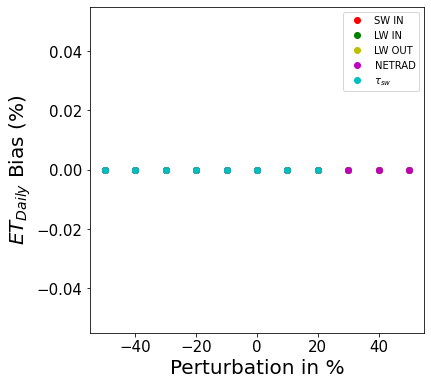

In [269]:
## Plotting the error_dailys 
fig,ax=plt.subplots(figsize=(6,6))
# plt.plot(albedo_error_daily["Sensitivity"],albedo_error_daily["Bias_LE"],"o",c="b",label="Albedo")
plt.plot(sw_in_error_daily["Sensitivity"],sw_in_error_daily["Bias_LE"],"o",c="r",label="SW IN")
plt.plot(lw_in_error_daily["Sensitivity"],lw_in_error_daily["Bias_LE"],"o",c="g",label="LW IN")
plt.plot(lw_out_error_daily["Sensitivity"],lw_out_error_daily["Bias_LE"],"o",c="y",label="LW OUT")
plt.plot(netrad_error_daily["Sensitivity"],netrad_error_daily["Bias_LE"],"o",c="m",label="NETRAD")
plt.plot(trans_error_daily["Sensitivity"],trans_error_daily["Bias_LE"],"o",c="c",label=r"$\tau_{sw}$")

plt.legend(fontsize=10)
plt.xlabel("Perturbation in %",fontsize=20)
plt.ylabel("$ET_{Daily}$ Bias (%)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.plot(np.linspace(0,0,10),np.linspace(-100,120,10),linewidth=2,c="k")
# plt.plot(np.linspace(-50,50,5),np.linspace(0,0,5),linewidth=2,c="k")

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

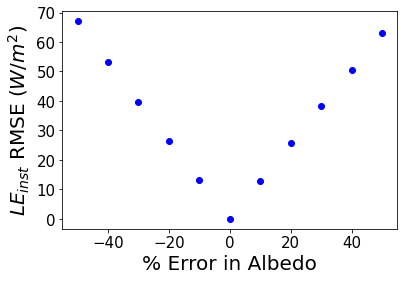

In [138]:
plt.plot(albedo_error["Bias_Albedo"],albedo_error["rmse_LE"],"o",c="b",label="Albedo")
plt.xlabel("% Error in Albedo",fontsize=20)
plt.ylabel("$LE_{inst}$ RMSE $(W/m^2)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([-30., -20., -10.,   0.,  10.,  20.,  30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

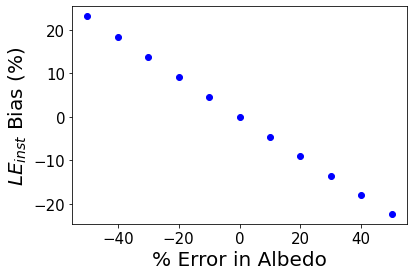

In [139]:
plt.plot(albedo_error["Bias_Albedo"],albedo_error["Bias_LE"],"o",c="b",label="Albedo")
plt.xlabel("% Error in Albedo",fontsize=20)
plt.ylabel("$LE_{inst}$ Bias (%)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 80.,  90., 100., 110., 120., 130., 140., 150., 160., 170.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

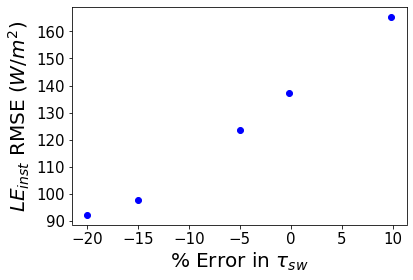

In [306]:
plt.plot(trans_error["Bias_tao"],trans_error["rmse_LE"],"o",c="b",label="Tao")
plt.xlabel(r"% Error in $\tau_{sw}$",fontsize=20)
plt.ylabel("$LE_{inst}$ RMSE $(W/m^2)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

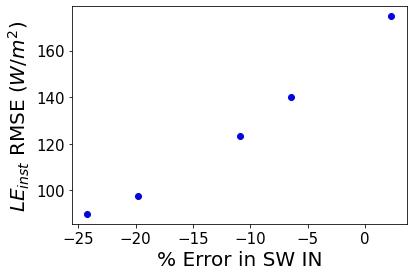

In [258]:
plt.plot(sw_in_error["Bias_SW_IN"],sw_in_error["rmse_LE"],"o",c="b",label="SW IN")
plt.xlabel("% Error in SW IN",fontsize=20)
plt.ylabel("$LE_{inst}$ RMSE $(W/m^2)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([100., 110., 120., 130., 140., 150.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

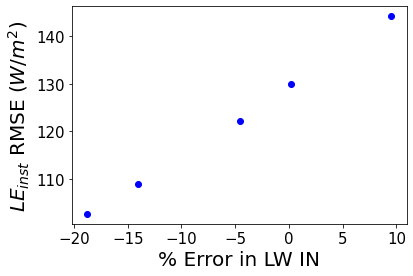

In [261]:
plt.plot(lw_in_error["Bias_LW_IN"],lw_in_error["rmse_LE"],"o",c="b",label="lw IN")
plt.xlabel("% Error in LW IN",fontsize=20)
plt.ylabel("$LE_{inst}$ RMSE $(W/m^2)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 80.,  90., 100., 110., 120., 130., 140., 150., 160., 170.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

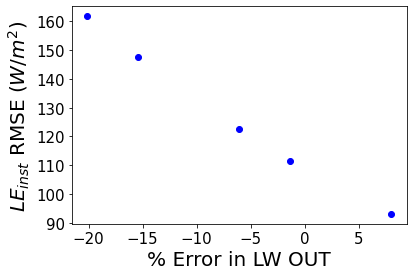

In [263]:
plt.plot(lw_out_error["Bias_LW_OUT"],lw_out_error["rmse_LE"],"o",c="b",label="lw IN")
plt.xlabel("% Error in LW OUT",fontsize=20)
plt.ylabel("$LE_{inst}$ RMSE $(W/m^2)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 80.,  90., 100., 110., 120., 130., 140., 150., 160., 170.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

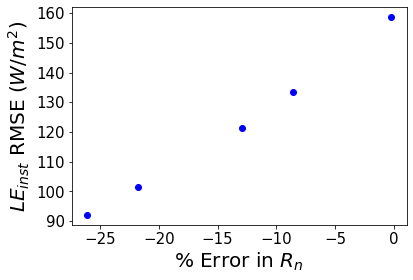

In [267]:
plt.plot(netrad_error["Bias_NETRAD"],netrad_error["rmse_LE"],"o",c="b",label="lw IN")
plt.xlabel("% Error in $R_{n}$",fontsize=20)
plt.ylabel("$LE_{inst}$ RMSE $(W/m^2)$",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)